In [7]:
import random

from typing import List, Tuple
from wand.image import Image as WImage

# Лабораторная работа 1. Методы сортировки

Вариант: 9

## Поразрядная сортировка (radix sort)

Существует два варианта реализации для чисел и строк текста:
- по правой стороне, в сторону единиц — LSD от least significant digit

- по левой стороне, со стороны более значащих разрядов — MSD от most significant digit

### Классификация алгоритма:

- По типу алгоритма: обменная сортировка

- По устойчивости: устойчивый

- По месту хранения данных: на месте

- По выделению дополнительного пространства: требуется дополнительная память

- По дополнительным затратам памяти: $O(n)$
   
- Время выполнения:
  
  - В худшем случае: $O(nk)$
  
  - В лучшем случае: $O(nk)$
  
  - В среднем: $O(nk)$
  
  k - количество разрядов в самом длинном числе

### Описание алгоритма:

Сравнение производится поразрядно: сначала сравниваются значения одного крайнего разряда, и элементы группируются по результатам этого сравнения, затем сравниваются значения следующего разряда, соседнего, и элементы либо упорядочиваются по результатам сравнения значений этого разряда внутри образованных на предыдущем проходе групп, либо переупорядочиваются в целом, но сохраняя относительный порядок, достигнутый при предыдущей сортировке. Затем аналогично делается для следующего разряда, и так до конца.

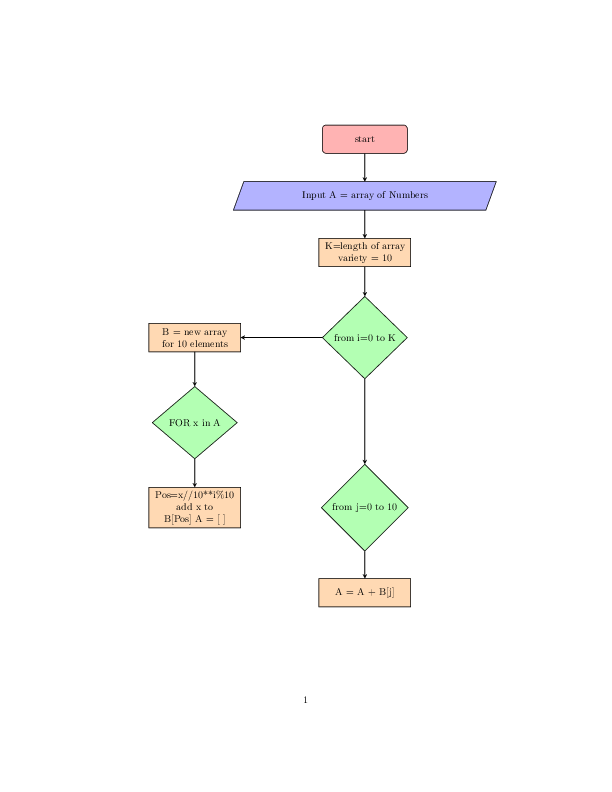

In [8]:
### Блок-схема алгоритма
img = WImage(filename='./img/test_2.pdf')
img

### Псевдокод алгоритма

```
k=length of max number
FOR от i=0 до k do
 Make new array for 10 elements 
  FOR x in A
   pos_in_array = x // 10**i % 10
    add x into B[pos_in_array]
  A = []
  FOR от j=0 до 10 do
   A = A + B[j]
```


### Реализация алгоритма

Достоинства алгоритма:
    
    -- простота реализации
    -- высокая эффективность
    -- возможность сортировки любых данных, сравнимых между собой
    
Недостатки:

    -- необходима дополнительная память

In [ ]:
def radix_sort(A: List) -> List:
    k = len(str(max(A)))
    variety = 10
    for i in range(k):
        B = [[] for j in range(variety)]
        for x in A:
            figure = x // 10**i % 10
            B[figure].append(x)
        A = []
        for j in range(variety):
            A = A + B[j]
    return A

### Реализация алгоритма
| step | elements      |
|:-----|:--------------|
| 1    | 51, 1, 32, 4, 2 |
| 2    | [ ] [51] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] |
| 3    | [ ] [51, 1] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] |
| 4    | [ ] [51, 1] [32] [ ] [ ] [ ] [ ] [ ] [ ] [ ] |
| 5    | [ ] [51, 1] [32] [ ] [4] [ ] [ ] [ ] [ ] [ ] |
| 6    | [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] |
| 7    | [ ] [ ] [ ] [ ] [ ] [51] [ ] [ ] [ ] [ ] |
| 8    | [1] [ ] [ ] [ ] [ ] [51] [ ] [ ] [ ] [ ] |
| 9    | [1, 2] [ ] [ ] [ ] [ ] [51] [ ] [ ] [ ] [ ] |
| 10   | [1, 2] [ ] [ ] [32] [ ] [51] [ ] [ ] [ ] [ ] |
| 11   | 1, 2, 4, 32, 51 |

In [ ]:
### Тестирование программы

sortmethod = radix_sort

assert sortmethod([1, 2, 3, 4]) == [1, 2, 3, 4], 'Ошибка при сортировки отсортированного массива'

assert sortmethod([4, 3, 2, 1]) == [1, 2, 3, 4], 'Ошибка при сортировки отсортированного в обратном порядке массива'

assert sortmethod([1, 3, 4, 2]) == [1, 2, 3, 4], 'Ошибка при сортировки произвольного массива'

assert sortmethod([1, 3, 1, 2]) == [1, 1, 2, 3], 'Ошибка при сортировки массива с повторящимися элементами'


In [ ]:
# Набор данных для тестирования алгоритма

def get_sort_array(n:int)->Tuple:
    '''Возвращает отсортированный массив'''
    return tuple(range(n))

def get_reverse_array(n:int)->Tuple:
    '''Возвращает отсортированный в обратном порядке массив'''
    return tuple(range(n))[::-1]

def get_random_array(n:int)->Tuple:
    '''Возвращает перемешанный массив'''
    return tuple(random.sample(range(n), n))


In [ ]:
from datetime import datetime

length = [500, 1000, 10000, 100000, 1000000]
cpu_times = {
    'sort_array' : [],
    'reverse_array' : [],
    'random_array' : []
}

for arr_len in length:
    # Для сортированного массива
    start_time = datetime.now()
    sortmethod(list(get_sort_array(arr_len)))
    cpu_times['sort_array'].append(str(datetime.now() - start_time))

    # Для перевернутого массива
    start_time = datetime.now()
    sortmethod(list(get_reverse_array(arr_len)))
    cpu_times['reverse_array'].append(str(datetime.now() - start_time))

    # Для рандомного массива
    start_time = datetime.now()
    sortmethod(list(get_random_array(arr_len)))
    cpu_times['random_array'].append(str(datetime.now() - start_time))

In [ ]:
from matplotlib import pyplot

for key in cpu_times:
    pyplot.plot(length, cpu_times[key])
    pyplot.title(key)
    pyplot.xlabel('array size')
    pyplot.ylabel('time')
    pyplot.show()
pyplot.show()

### Литература

Роберт Седжвик. Фундаментальные алгоритмы на C. Анализ/Структуры данных/Сортировка/Поиск = Algorithms in C. Fundamentals/Data Structures/Sorting/Searching. — СПб.: ДиаСофтЮП, 2003. — С. 672. — ISBN 5-93772-081-4.

https://ru.overleaf.com/learn/latex/LaTeX_Graphics_using_TikZ%3A_A_Tutorial_for_Beginners_(Part_3)%E2%80%94Creating_Flowcharts

https://www.ctan.org/pkg/nassflow